# Gradient Descent

Gradient Descent is a fundamental optimization algorithm used to minimize the loss function in models during the training process. The goal is to find the optimal parameters (weights and biases) for the model that minimizes the difference between the predicted outputs and the actual targets

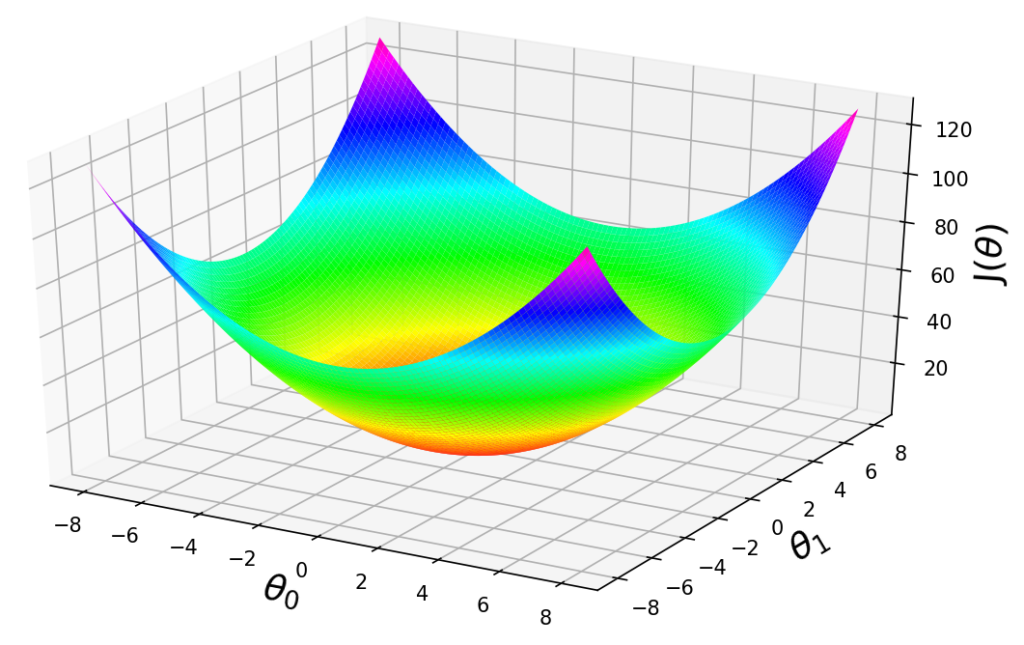

# Example

Gradient Descent is like trying to find the lowest point in a hilly terrain by taking small steps downhill. Imagine you're blindfolded and want to get to the bottom of a valley. You start at a random point and feel the ground to figure out which direction it slopes. You take small steps downhill until you can't go downhill anymore, which means you've reached the bottom.

In machine learning, the "hilly terrain" represents the loss function, which tells us how bad our model is performing. The "lowest point" is where our model performs the best. We start with random values for our model's parameters (like weights and biases), and Gradient Descent helps us adjust these parameters in the direction that reduces the loss, making our model better at predicting the correct outputs.

In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

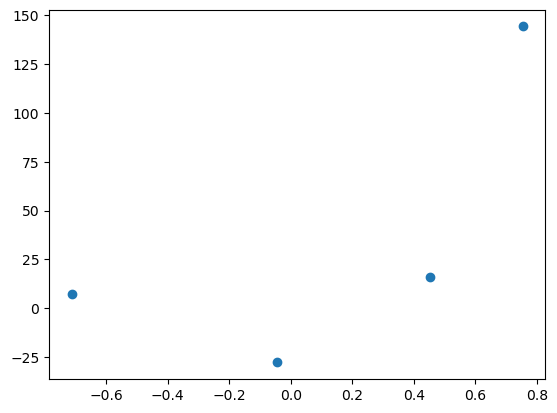

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression    

In [5]:
reg = LinearRegression()
reg.fit(X,y)
     

LinearRegression()

In [6]:
reg.coef_#m = 78.35

array([78.35063668])

In [7]:
reg.intercept_ #b = 26.15

26.15963284313262

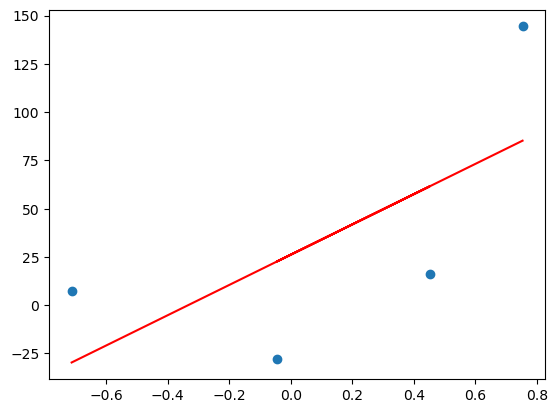

In [8]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [12]:
y_pred = ((78.35 * X) + 0).reshape(4)#b = 100

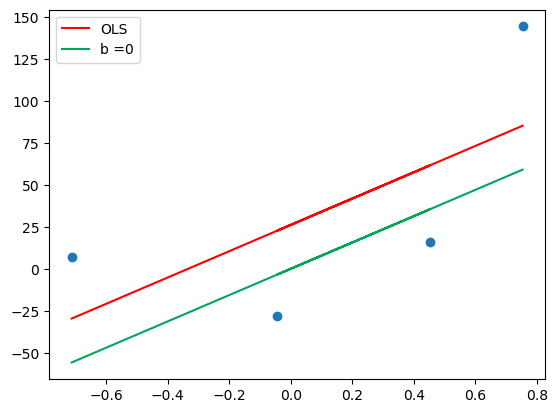

In [13]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b =0')
plt.legend()
plt.show()
     

In [17]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)# LS = -2 (y - mx -b)
loss_slope

-209.27763408209216

In [18]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [19]:
b = b - step_size# 0 -
b
     


20.927763408209216

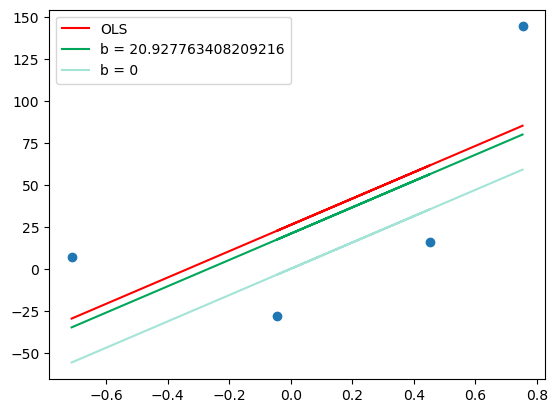

In [20]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [21]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [22]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [23]:
b = b - step_size
b
     

25.11331608985106

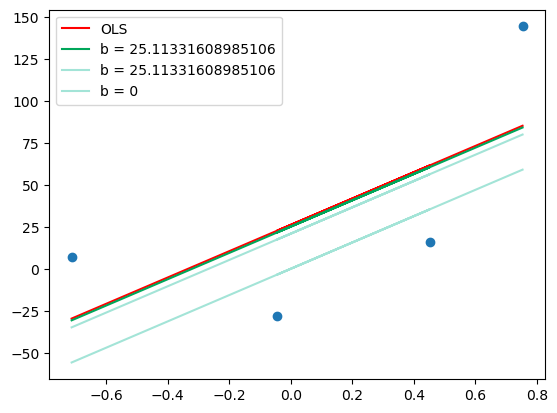

In [24]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

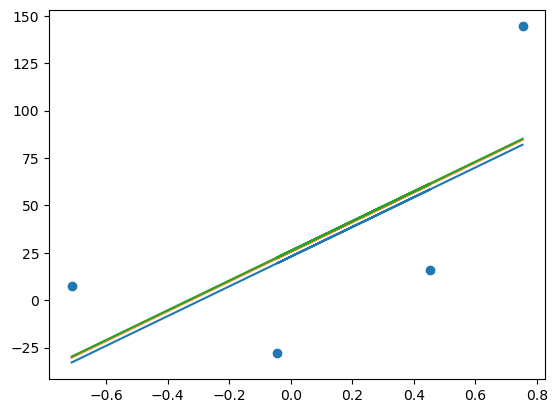

In [27]:

b = 10
m = 78.35
lr = 0.1

epochs = 3

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)

    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)

In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [4]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


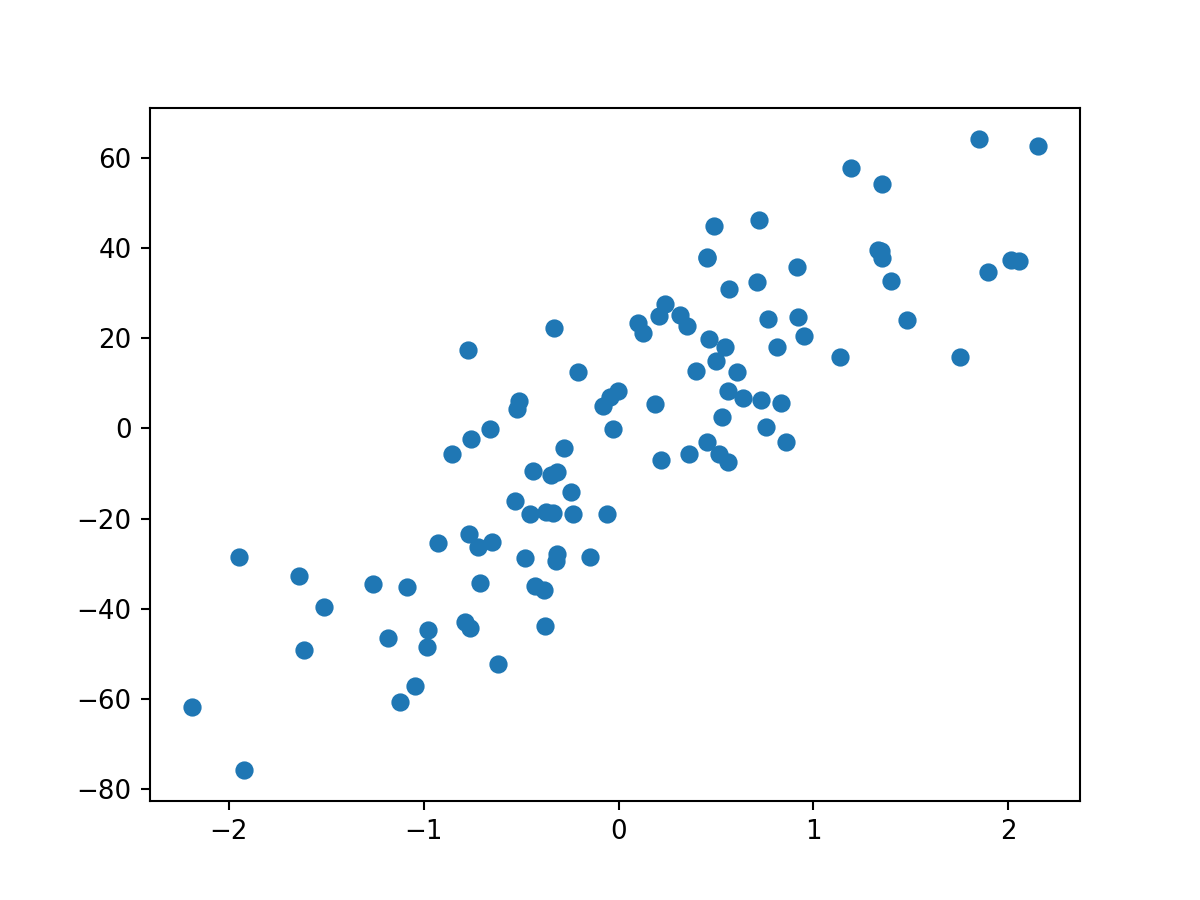

In [5]:
plt.scatter(X,y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


# With M & b

In [15]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 200
        self.b = 10
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            print(self.b,self.m)
        #print(self.b,self.m)
        
    
    

In [22]:
gd = GDRegressor(0.01,10)

In [23]:
gd.fit(X_train,y_train)

-23.561404753406322 -61.83311804556172
17.793038994196678 76.41548342812504
-18.222578478921356 1.5046728398644262
9.457176430299228 43.19821126395123
-10.529305104348428 19.373952915188962
3.3931784220804317 33.32536649749416
-6.09086205168358 24.975688376420052
0.27617693777994035 30.06615125830868
-3.956551224614162 26.915295350193297
-1.1615852701171132 28.88922653819479


# Importance of Learning Rate

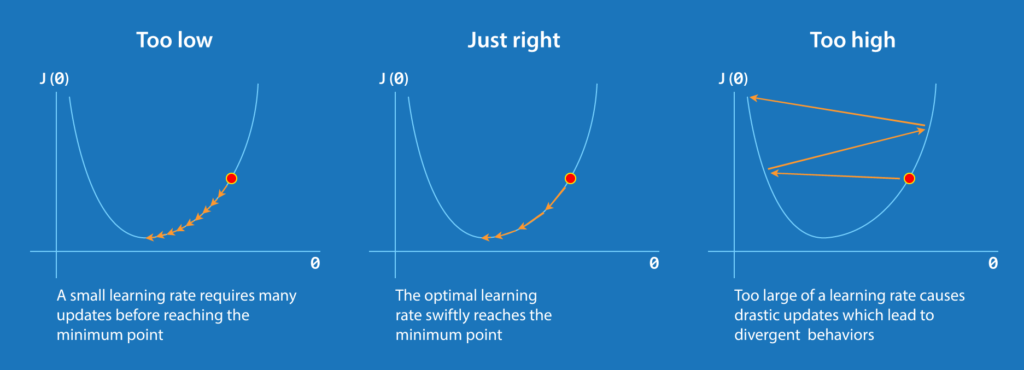

In [24]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [36]:
b = -200
m = 48
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 15

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

<IPython.core.display.Javascript object>


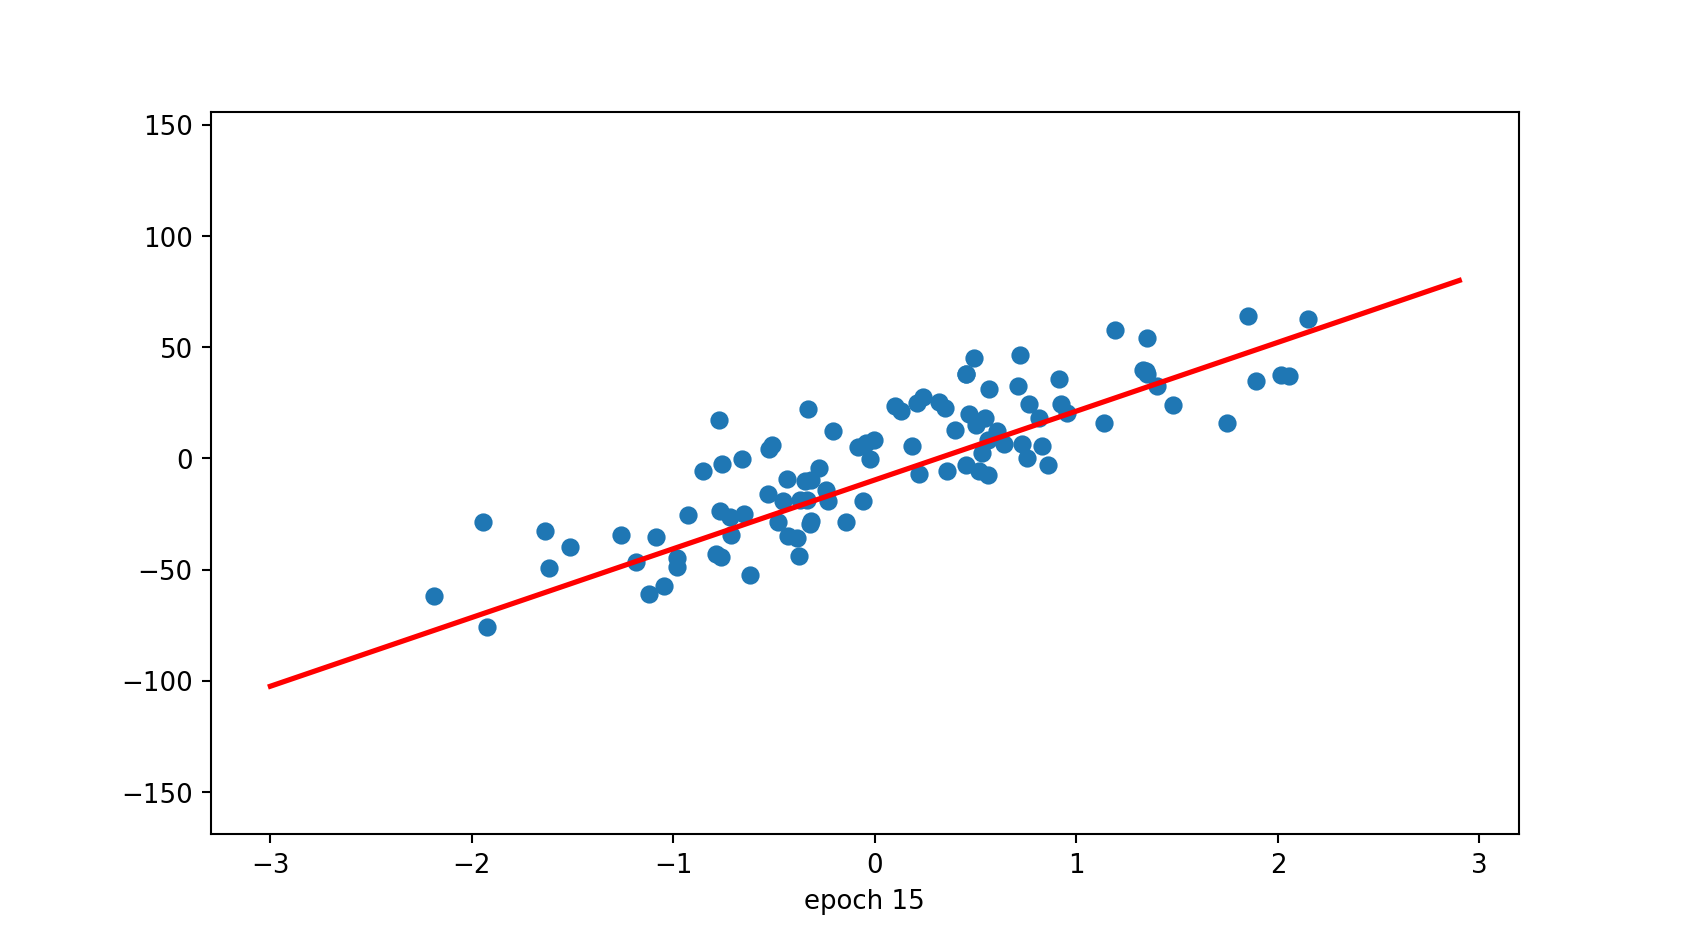

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

f = r"animation4.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)


# Loss Function Problem

1.Non-Convexity

2.Non-Differentiability

3.Computational Complexity

4.Difficulty in Interpreting

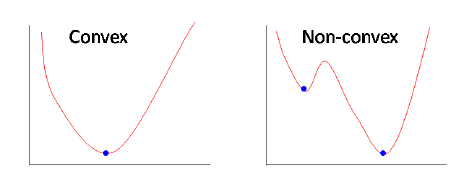

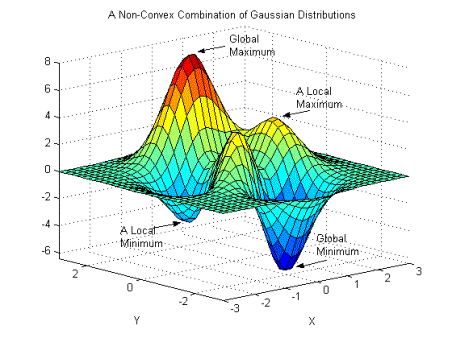

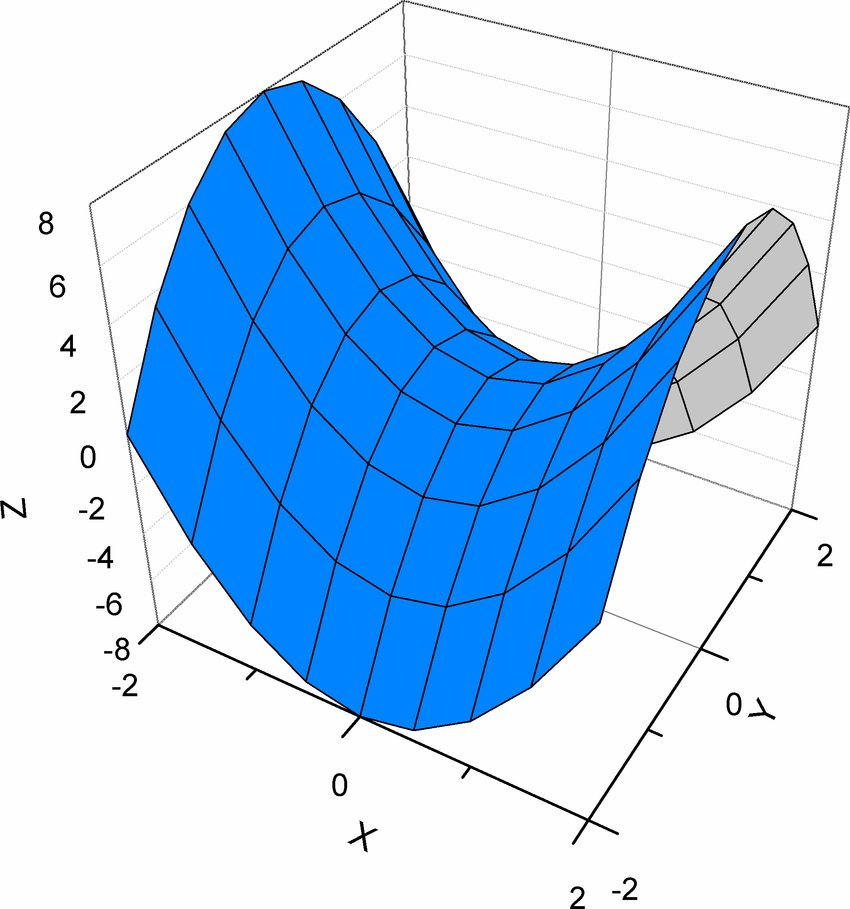